## CCNSS 2018 Module 5: Whole-Brain Dynamics and Cognition
# Tutorial 3: Kuramoto model (I)


*Please execute the cells bellow in order to initialize the notebook environment*

In [1]:
!if [ ! -d data ]; then git clone https://github.com/ccnss/ccnss2018_students; \
                        cp -rf ccnss2018_students/module5/3_kuramoto_model_1/data ./; fi

Cloning into 'ccnss2018_students'...
remote: Counting objects: 975, done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 975 (delta 20), reused 28 (delta 8), pack-reused 918
Receiving objects: 100% (975/975), 65.70 MiB | 24.02 MiB/s, done.
Resolving deltas: 100% (298/298), done.


In [10]:
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import math                        # import basic math functions
import random                      # import basic random number generator functions
import csv                         # import CSV(Comma Separated Values) file reading and writing
import scipy as sp                 # import scipy
from scipy import sparse           # import sparse module from scipy
from scipy import signal           # import signal module from scipy

import os                          # import basic os functions
import time                        # import time to measure real time
import collections                 # import collections
import networkx as nx              # import networkx 


data_folder = 'data'

print('Available data files:\n'+'\n'.join(sorted(os.listdir(data_folder))))

data_file_1 = os.path.join(data_folder, 'gong_net_list.txt')
data_file_2 = os.path.join(data_folder, 'macaque_net_list.txt')
data_file_3 = os.path.join(data_folder, 'gong_net_list_left.txt')

Available data files:
gong_net_coordinate.txt
gong_net_list.txt
gong_net_list_left.txt
gong_net_list_right.txt
gong_net_name.txt
macaque_net_cordinate.txt
macaque_net_list.txt
macaque_net_name.txt


# Objectives

In this notebook we will program a Kuramoto oscillator model. We will begin with a two-oscillators model, and proceed to more general form of the model with all-to-all connected n oscillator model. In the end, we put the oscillator on top of a network.


## Background

The Kuramoto model, first proposed by Yoshiki Kuramoto, is a mathematical model used to describe synchronization. More specifically, it is a model for the behavior of a large set of coupled oscillators. Its formulation was motivated by the behavior of systems of chemical and biological oscillators, and it has found widespread applications such as in neuroscience. Mathematically, it is a canonial model for general oscillators and a first approximation to more complex oscillator models.  


**EXERCISE 1: Two-oscillator Kuramoto model**

 For a set of N oscillators, Kuramoto model is written as:

$$ \frac {d \theta_i} {dt} = \omega_i + \frac{K}{N} \sum_{j=1}^{N} \sin( \theta_j - \theta_i),  \quad    i=1,...N, $$

where $ \theta_i $ denotes phases of each oscillator and $ K $ is the coupling strength. In this exercise, we will program two oscillator systems, $ N=2 $.


We also define "order parameters" $r$ and $\psi$ as the following:

$$ r e^{i \psi} = \frac{1}{N} \sum_{j=1}^{N} e^{i \theta_j} . $$

The order parameter $r$ will give you the degree of synchrony among the oscillators.

In $ N=2 $ model, the system will constitute of two equations coupled with each other:

$$ \frac {d \theta_1} {dt} = \omega_1 + \frac{K}{N} \sin( \theta_2 - \theta_1),  \quad  \\  \frac {d \theta_2} {dt} = \omega_2 + \frac{K}{N} \sin( \theta_1 - \theta_2). $$

Given the following initial conditions ( $ \omega_{1} = \omega_{2} =10 \times 2\pi $ rad/s , the initial phases $ \theta_i $ differ by $ 0.9 \times \pi $, and the coupling strength $ K=1 $): 

• Plot $ \sin(\theta_i) $ and $ r $ as function of $ t $, from $ 0 $ to $ 2 $.

• For the values you obtained for $ r(t) $, remove the first half of the time points and average over only the latter half of the time points to calculate the time averaged order parameter $ \langle r \rangle_t $. What is the value?

• Change the value of $ K $ systematically from 0 to 1 with 0.1 increments, and plot $ \langle r \rangle $, for each value of $ K $.




In [0]:
def simulate_k_2(N,K,W,theta_1_ini,theta_2_ini,t):
    """Simulate the Kuramoto equations of two oscillators.
   
    Arguments:
    N -- number of oscillators
    K -- strength
    W -- initial frequency
    theta_1_ini -- initial theta of oscillator # 1  
    theta_2_ini -- initial theta of oscillator # 2
    t -- time (vector)
    
    Returns:
    theta_1 -- phase of the oscillator #1, length of t (vector)
    theta_2 -- phase of the oscillator #2, length of t (vector)
    r -- order parameter r, length of t (vector)
    psi == order parameter psi, length of t (vector)
   """
    
    dt = t[1]-t[0]
    # initialize variables
    theta_1 = np.zeros(len(t))
    theta_2 = np.zeros(len(t))
    r = np.zeros(len(t))
    psi = np.zeros(len(t))
    
    # define initial values of the variables
    theta_1[0] = theta_1_ini
    theta_2[0] = theta_2_ini
    r[0] = 1/N*np.absolute( ( math.cos(theta_1[0])+math.cos(theta_2[0]) ) + ( math.sin(theta_1[0])+math.sin(theta_2[0]) )*1j )
    psi[0] = np.angle( ( math.cos(theta_1[0])+math.cos(theta_2[0]) ) + ( math.sin(theta_1[0])+ math.sin(theta_2[0]) )*1j )
    
    for k in range(len(t)-1):
        # finish this code by filling this part in
        
        theta_1[k+1] = theta_1[k] + dt*()
        theta_2[k+1] = theta_2[k] + dt*(
        r[k+1] =
        psi[k+1] =
        
    return theta_1,theta_2,r,psi

In [0]:
# average over time taking only the latter half of the time series  
def compute_r_tavg(r):

    r_half = r[int(0.5*len(r)):len(r)-1]
    r_tavg = np.mean(r_half)
    return r_tavg

In [0]:
# number of oscillators
N = 2

# initial frequency
W = 10*2*np.pi

# initial theta
random.seed()
theta_1_ini = random.random()*2*np.pi
theta_2_ini = theta_1_ini + 0.9*np.pi

# coupling strength
K = 1

# time
dt = 0.001
t = np.arange(0,10,dt)

# calculating for K = 1
theta_1_2,theta_2_2,r_2,psi_2 = simulate_k_2(N,K/N,W,theta_1_ini,theta_2_ini,t)

plt.figure()
t1 = np.arange(0,2,dt)
plt.plot(t1,np.sin(theta_1_2[0:len(t1)]))
plt.plot(t1,np.sin(theta_2_2[0:len(t1)]))
plt.xlabel('t')
plt.ylabel('sin(theta)')
plt.show()

plt.figure()
plt.plot(t,r_2)
plt.xlabel('t')
plt.ylabel('order parameter r')
plt.show()

r_2_tavg = compute_r_tavg(r_2)
print("order parameter r:",r_2_tavg)

# calculatinf for 
Ks = np.arange(0,1.1,0.1)
rs_2 = np.zeros(len(Ks))

for k in range(len(Ks)):    
    theta_1_2,theta_2_2,r_2,psi_2 = simulate_k_2(N,Ks[k]/N,W,theta_1_ini,theta_2_ini,t)
    rs_2[k] = compute_r_tavg(r_2)

plt.figure()
plt.plot(Ks,rs_2,'C0o')
plt.xlabel('K')
plt.ylabel('< r >')
plt.show()

print("order parameters r:", rs_2)

**EXPECTED OUTPUT**

![](https://github.com/ccnss/ccnss2018_students/raw/master/module5/3_kuramoto_model_1/figures/1_sin_theta2.png)

![](https://github.com/ccnss/ccnss2018_students/raw/master/module5/3_kuramoto_model_1/figures/1_order_parameter.png)
```
order parameter r: 0.9999096289763593
```
![](https://github.com/ccnss/ccnss2018_students/raw/master/module5/3_kuramoto_model_1/figures/1_r.png)
```
order parameters r: [0.15643447 0.31992504 0.57848153 0.80892705 0.9284012  0.9756604
 0.99206863 0.99743885 0.99916835 0.99972725 0.99990963]
 ```

**EXERCISE 2: all-to-all connected Kuramoto model**

Now, we can expand this system into $ N $ oscillators. Let $ N=78 $, and repeat the Exercise 1 for such system:

$$ \frac {d \theta_i} {dt} = \omega_i + \frac{K}{N} \sum_{j=1}^{N} \sin( \theta_j - \theta_i),  \quad    i=1,...78.  $$


Give the following intial conditions: $ \omega=10 \times 2\pi $, random initial phases $ \theta_i $ with $ \theta_1 - \theta_2 = -\pi/2 $ and $ \theta_1 - \theta_3 = \pi/2 $, and coupling strength $ K=1 $. 

• Plot $ sin(\theta_i ) $ and $ r $ as function of $ t $, from $ 0 $ to $ 2 $, for $ i = 1, 2, 3 $.

• By throwing out first-half of the time points, and averaging over only the latter-half of the time points for $ r(t) $, calculate mean order parameter $ \langle r \rangle_t $. What is the value?

• Change the value of $ K $ from $ 0 $ to $ 1 $ by increment of $ 0.1 $, and plot and print $ \langle r \rangle_t $, for each value of $ K $.



In [0]:
def simulate_k(N,K,W,theta_ini,t):
    
   # finish the code by filling in
            
    return theta,r,psi

In [0]:
# number of oscillators
N = 78

# initial frequency
W = 10*2*np.pi

# initial theta
random.seed()

theta_ini = np.random.rand(78)*2*np.pi
theta_ini[1] = theta_ini[0] + 0.5*np.pi
theta_ini[2] = theta_ini[0] -0.5*np.pi

# coupling strength
K = 1

# time
dt = 0.001
t = np.arange(0,10,dt)


theta,r,psi = simulate_k(N,K/N,W,theta_ini,t)
  
plt.figure()
t1 = np.arange(0,2,dt)
plt.plot(t1,np.sin(theta[0:len(t1),0] ))
plt.plot(t1,np.sin(theta[0:len(t1),1] ))
plt.plot(t1,np.sin(theta[0:len(t1),2] ))
plt.xlabel('t')
plt.ylabel('sin(theta)')
plt.show()


plt.figure()
plt.plot(t,r)
plt.xlabel('t')
plt.ylabel('order parameter r')
plt.show()

  
print("order parameter r:",compute_r_tavg(r))


Ks = np.arange(0,1.1,0.1)
rs = np.zeros(len(Ks))

for k in range(len(Ks)):    
    theta,r,psi = simulate_k(N,Ks[k]/N,W,theta_ini,t)
    rs[k] = compute_r_tavg(r)

plt.figure()
plt.plot(Ks,rs,'C0o')
plt.xlabel('K')
plt.ylabel('< r >')
plt.show()

print("order parameters r:",rs)

**EXPECTED OUTPUT**

![](https://github.com/ccnss/ccnss2018_students/raw/master/module5/3_kuramoto_model_1/figures/2_sin_theta78.png)

![](https://github.com/ccnss/ccnss2018_students/raw/master/module5/3_kuramoto_model_1/figures/2_order_parameter.png)
```
order parameter r: 0.28323282959549173
```
![](https://github.com/ccnss/ccnss2018_students/raw/master/module5/3_kuramoto_model_1/figures/2_r.png)
```
order parameters r: [0.2016428  0.28323283 0.39105667 0.51990618 0.65341273 0.77091229
 0.85981134 0.91954699 0.95590265 0.97673137 0.98811207]
 ```

**EXERCISE 3: Kuramoto model on a arbitrary network**

Finally, the system need not to be all-to-all connected. We can place the connectivity matrix from Tutorial 1 & 2 into the system:

$$ \frac {d \theta_i} {dt} = \omega_i + \frac{K}{N} \sum_{j=1}^{N} A_{ji} \sin( \theta_j - \theta_i),  \quad    i=1,...N, $$

where $A_{ji}$ will denote the connectivity between two nodes $j$ and $i$ (with value of either 1 or 0).

• Using a Gong network of human brain, repeat the above exercise: compute, plot, and print $\langle r \rangle$ for $K\in\{0, 2, 4, ..., 20\} $.

• Using a macaque brain network, repeat the above: get $\langle r \rangle$ for $K\in\{0, 2, 4, ..., 20\} $.

• Compare the results from the human network and macaque brain network. How do they differ? Which one shows higher $r$ at same coupling strength $K$?

• Now, do simulation on the left hemisphere network from the full human network. Is the result similar to the results from the full human network or macaque network? One could apply network measures (ex: $ C, E, L, $ and $ b $) to each networks to observe that such differences in the underlying network structure has influence on the outcome of the Kuramoto model.


In [0]:
net_gong_ut = [ row for row in csv.reader(open(data_file_1,'r'),delimiter='\t')]
net_gong_ut = np.array(net_gong_ut).astype(int)
net_gong_lt = net_gong_ut[:,(1,0,2)]
net_gong = np.concatenate( (net_gong_ut, net_gong_lt), axis=0)

net_row_gong = net_gong[:,0]-1
net_column_gong = net_gong[:,1]-1
net_value_gong = net_gong[:,2]
net_coord_gong = np.column_stack((net_row_gong,net_column_gong))

In [0]:
net_macaque_ut = [ row for row in csv.reader(open(data_file_2,'r'),delimiter='\t')]
net_macaque_ut = np.array(net_macaque_ut).astype(int)
net_macaque_lt = net_macaque_ut[:,(1,0,2)]
net_macaque = np.concatenate( (net_macaque_ut, net_macaque_lt), axis=0)

net_row_macaque = net_macaque[:,0]-1
net_column_macaque = net_macaque[:,1]-1
net_value_macaque = net_macaque[:,2]
net_coord_macaque = np.column_stack((net_row_macaque,net_column_macaque))

In [0]:
net_gong_left_ut = [ row for row in csv.reader(open(data_file_3,'r'),delimiter='\t')]
net_gong_left_ut = np.array(net_gong_left_ut).astype(int)
net_gong_left_lt = net_gong_left_ut[:,(1,0,2)]
net_gong_left = np.concatenate( (net_gong_left_ut, net_gong_left_lt), axis=0)

net_row_gong_left = net_gong_left[:,0]-1
net_column_gong_left = net_gong_left[:,1]-1
net_value_gong_left = net_gong_left[:,2]
net_coord_gong_left = net_gong_left[:,0:2:1]-1

In [0]:
# insert your code here for the kuramoto model on general network structure


# kuramoto model code for general network
def simulate_k_mat(N,K,W,theta_ini,t,net_coord,net_row,net_column):
        
        # finish code by filling in

    return theta,r,psi
  

In [0]:
  
# analysis for Gong network

# what time is it now?
rt0 = time.time()


# initial frequency
W = 10*2*np.pi

# time
dt = 0.001
t = np.arange(0,10,dt)


# number of oscillators
N_gong = 78

# initial theta
random.seed()

theta_ini = np.random.rand(N_gong)*2*np.pi
theta_ini[1] = theta_ini[0] + 0.5*np.pi
theta_ini[2] = theta_ini[0] -0.5*np.pi

Ks = np.arange(0,22,2)
rs = np.zeros(len(Ks))

for k in range(len(Ks)):    
    theta,r,psi = simulate_k_mat(N_gong,Ks[k]/N_gong,W,theta_ini,t,net_coord_gong,net_row_gong,net_column_gong)
    rs[k] = compute_r_tavg(r)

plt.figure()
plt.plot(Ks,rs,'C0o')
plt.xlabel('K')
plt.ylabel('< r >')
plt.title('Gong network')
plt.show()

print("order paramters r:", rs)

# what time is it now and how long did it take?
rt1 = time.time()
print('time spent for calculation:{}s'.format(rt1-rt0))

**EXPECTED OUTPUT**

![](https://github.com/ccnss/ccnss2018_students/raw/master/module5/3_kuramoto_model_1/figures/3_gong_network.png)

```
order paramters r: [0.1393224  0.24157697 0.3674551  0.48482751 0.56560936 0.61542329
 0.65151513 0.68857538 0.73341892 0.77922427 0.8214098 ]
```

In [0]:
# analysis for Macaque network

# write your code here 

**EXPECTED OUTPUT**

![](https://github.com/ccnss/ccnss2018_students/raw/master/module5/3_kuramoto_model_1/figures/3_macaque_network.png)

```
order parameter r: [0.05995196 0.76879962 0.95782633 0.98763111 0.99554264 0.9980832
 0.99909259 0.99954655 0.99976534 0.99987547 0.99993263]
```

In [0]:

# analysis for Gong network left hemisphere

# write your code here 

**EXPECTED OUTPUT**

![](https://github.com/ccnss/ccnss2018_students/raw/master/module5/3_kuramoto_model_1/figures/4_gong_left.png)

```
order parameter: [0.10373642 0.67921688 0.93787893 0.9929204  0.99883204 0.99975254
 0.99994026 0.99998448 0.99999578 0.99999882 0.99999966]
```

**EXERCISE 4: Averaging over multiple runs of simulations (optional)**

In Exercise 3, you may have noticed that your result is not similar with the figure that was provided. We will perform averaging over many random initial conditions in this excercise.


• Perform the simulation on Gong network two times and plot ⟨r⟩ for  $ K∈\{0,2,4,...,20 \} $ and compare. Are they equal to each other?

• Now, run the simulation 10 times with different random initial conditions of $ \theta_i $.

• Average ⟨r⟩ for each $ K $. Plot the result.

• Does the averaged result differ from the single run results? How is the result different to the result from macaque network?

In [0]:
# analysis for Gong network

# what time is it now?
rt0 = time.time()

# initial frequency
W = 10*2*np.pi

# time
dt = 0.001
t = np.arange(0,10,dt)

# number of oscillators
N_gong = 78

# number of runs
nr = 10

# initialize Ks
Ks = np.arange(0,22,2)

# initialize rs_mean
rs_all = np.zeros((nr, Ks.shape[0]))

for n in range(nr):
    
    # initial theta
    random.seed()

    theta_ini = np.random.rand(N_gong)*2*np.pi
    theta_ini[1] = theta_ini[0] + 0.5*np.pi
    theta_ini[2] = theta_ini[0] -0.5*np.pi

    rs = np.zeros(len(Ks))

    for k in range(len(Ks)):    
        theta,r,psi = simulate_k_mat(N_gong,Ks[k]/N_gong,W,theta_ini,t,net_coord_gong,net_row_gong,net_column_gong)
        rs[k] = compute_r_tavg(r)

    rs_all[n,:]=rs
    
# what time is it now and how long did it take?
rt1 = time.time()
print('time spent for calculation:{}s'.format(rt1-rt0))

time spent for calculation:496.53482270240784s


[0.08794683 0.15681458 0.27385802 0.38845979 0.48426889 0.56171123
 0.62775431 0.68634348 0.73743992 0.78101206]


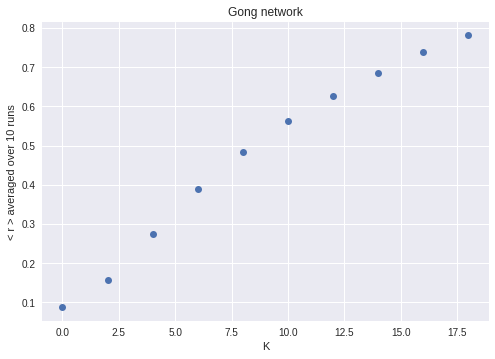

In [0]:
rs_mean = np.mean(rs_all, axis=0)
print(rs_mean)

plt.figure()
plt.plot(Ks,rs_mean,'C0o')
plt.xlabel('K')
plt.ylabel('< r > averaged over 10 runs')
plt.title('Gong network')
plt.show()

**EXPECTED OUTPUT**

```
[0.08794683 0.15681458 0.27385802 0.38845979 0.48426889 0.56171123
 0.62775431 0.68634348 0.73743992 0.78101206]
```
![](https://github.com/ccnss/ccnss2018_students/raw/master/module5/3_kuramoto_model_1/figures/4_gong_opt_network.png)

**EXERCISE 5 (optional)**

The following form is so-called mean field form of Kuramoto equations:

$$  \frac{d \theta_i} {dt} = \omega_i + Kr \sin ( \psi - \theta_i ) , \quad i=1,...,N, $$

where we also define "order parameters" $r$ and $\phi$ as the following:

$$ r e^{i \psi} = \frac{1}{N} \sum_{j=1}^{N} e^{i \theta_j} .$$


We will first compute the mean field equation, with $N=2$. Let us set $\omega=10 \times 2\pi$ (simulating alpha wave). 


• Give initial phase $\theta_i$ randomly but with difference of $0.9 \times \pi$, and let coupling strength $K=0.1$. By computing $\theta_i$ for $t=0,0.001,0.002,...,10$, find the value of $r$ and $\psi$. Plot $sin(\theta_i)$ and $r$ as function of $t$, from $0$ to $2$.

• By throwing out the first-half of the time points, and averaging over only the latter-half of the time points for $r(t)$, caculate mean order parameter $\langle r \rangle$. What is the value?

• Change the value of $K$ from 0 to 1 by increment of 0.1, and plot $\langle r \rangle$, for each value of $K$. Also, print the value of  $\langle r \rangle$ for each $K$.

In [0]:
# write your code here

def simulate_k_mean(N,K,W,theta_1_ini,theta_2_ini,t):
    """Simulate the Kuramoto equations of mean-field form.
   
    Arguments:
    N -- number of oscillators
    K -- coupling strength
    W -- initial frequency
    theta_1_ini -- initial theta of oscillator 1
    theta_2_ini -- initial theta of oscillator 2
    t -- time (vector)
    
    Returns:
    theta_1 -- phase of the oscillator 1
    theta_2 -- phase of the oscillator 2
    r -- order parameter r
    psi -- order parameter psi
   
    """
    # insert your code here
    return theta_1,theta_2,r,psi

In [0]:
# declare constants

# number of oscillators
N = 2

# initial frequency
W = 10

# initial theta
random.seed()
theta_1_ini = random.random()*2*np.pi
theta_2_ini = theta_1_ini + 0.9*np.pi

# coupling strength
K = 1

# time
dt = 0.001
t = np.arange(0,10,dt)

theta_1_m,theta_2_m,r_m,psi_m = simulate_k_mean(N,K,W,theta_1_ini,theta_2_ini,t)


plt.figure()
t1 = np.arange(0,2,dt)
plt.plot(t1,np.sin(theta_1_m[0:len(t1)]))
plt.plot(t1,np.sin(theta_2_m[0:len(t1)]))
plt.xlabel('t')
plt.ylabel('sin(theta)')
plt.show()

plt.figure()
plt.plot(t,r_m)
plt.xlabel('t')
plt.ylabel('order parameter r')
plt.show()

print("order parameter:", compute_r_tavg(r_m))



Ks = np.arange(0,1.1,0.1)
rs_mean = np.zeros(len(Ks))

for k in range(len(Ks)):    
    theta_1_m,theta_2_m,r_m,psi_m = simulate_k_mean(N,Ks[k]/2,W,theta_1_ini,theta_2_ini,t)
    rs_mean[k] = compute_r_tavg(r_m)

plt.figure()
plt.plot(Ks,rs_mean,'C0o')
plt.xlabel('K')
plt.ylabel('< r >')
plt.show()

print("order parameters:" ,rs_mean)



**Answer:**

**EXPECTED OUTPUT**

![](https://github.com/ccnss/ccnss2018_students/raw/master/module5/3_kuramoto_model_1/figures/5_sin_theta.png)

![](https://github.com/ccnss/ccnss2018_students/raw/master/module5/3_kuramoto_model_1/figures/5_order_parameter.png)
```
order parameter: 0.9999096289763588
```
![](https://github.com/ccnss/ccnss2018_students/raw/master/module5/3_kuramoto_model_1/figures/5_r.png)
```
order parameters: [0.15643447 0.22502058 0.31992504 0.44176971 0.57848153 0.70685154
 0.80892705 0.88108247 0.9284012  0.95790974 0.9756604 ]
 ```